In [1]:
%matplotlib inline
# to show the image <matplotlib.image.AxesImage at 0x.......>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

(1, 3, 3, 1)


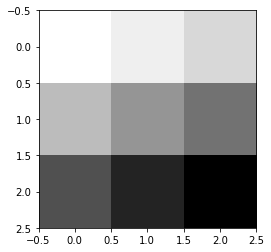

In [3]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

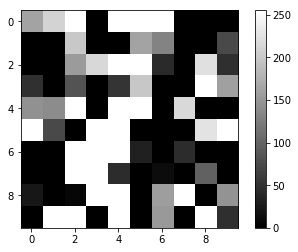

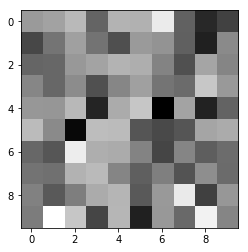

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import functools

bwimshow = functools.partial(plt.imshow, vmin=0, vmax=255,
                             cmap=plt.get_cmap('gray'))

dots = np.random.randn(10, 10)*255
bwimshow(dots)
cbar = plt.colorbar()
plt.show()
plt.imshow(dots, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
plt.imshow(dots, cmap=plt.get_cmap('gray'))

# cmap 
Colormap, optional, default: None

If None, default to rc image.cmap value. cmap is ignored if X is 3-D, directly specifying RGB(A) values.

*matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, * * kwargs)*

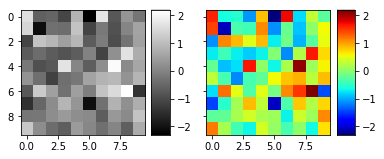

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1
np.random.seed(1)

data = np.random.randn(10, 10)

fig = plt.figure()
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)

im0 = grid[0].imshow(data, cmap='gray', interpolation='nearest')
grid.cbar_axes[0].colorbar(im0)

im1 = grid[1].imshow(data, cmap='jet', interpolation='nearest')
grid.cbar_axes[1].colorbar(im1)
plt.savefig('/tmp/test.png', bbox_inches='tight', pad_inches=0.0, dpi=200,)

## *InteractiveSession*  VS Session
http://stackoverflow.com/questions/41791469/difference-between-tf-session-and-tf-interactivesession
installs itself as the default session on construction. 
The methods Tensor.eval() and Operation.run() will use that session to run ops.

This allows to use interactive context, like shell, as it avoids having to pass an explicit Session object to run op
It is also possible to say, that InteractiveSession supports less typing, as allows to run variables without needing to constantly refer to the session object.

In [7]:
sess = tf.InteractiveSession()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
# We can just use 'c.eval()' without passing 'sess'
print(c.eval())
sess.close()

30.0


In [6]:
sess = tf.Session()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
# We can just use 'c.eval()' without passing 'sess'
print(c.eval())
sess.close()

30.0


## Args to show the shape of parameters
https://www.tensorflow.org/versions/r0.11/api_docs/python/nn/convolution     
**input**: 4-D with shape ***[batch, in_height, in_width, in_channels]***.    
**filter**: 4-D with shape ***[filter_height, filter_width, in_channels, channel_multiplier]***.     
**strides**: 1-D . The stride of the sliding window for each dimension of input.   
**padding**: A string, either '***VALID***' or '***SAME***'.      
**name**: A name for this operation (optional).

### input Layer
https://www.tensorflow.org/tutorials/layers

#### explain for (1, 3, 3, 1)
** here the first 1 means we just have 1 iamge,the other three are iamge width iamge height and iamges channel**

The methods in the layers module for creating convolutional and pooling layers for two-dimensional image data expect input tensors to have a shape of ***[batch_size, image_width, image_height, channels]***, defined as follows:

**batch_size**. Size of the subset of examples to use when performing gradient descent during training.
**image_width**. Width of the example images.
**image_height**. Height of the example images.
**channels**. Number of color channels in the example images. For color images, the number of channels is 3 (red, green, blue). For monochrome images, there is just 1 channel (black).

Here, our MNIST dataset is composed of monochrome 28x28 pixel images, so the desired shape for our input layer is [batch_size, 28, 28, 1].

To convert our input feature map (features) to this shape, we can perform the following reshape operation:

**input_layer = tf.reshape(features, [-1, 28, 28, 1])**

Note that we've indicated -1 for batch size, which specifies that this dimension should be dynamically computed based on the number of input values in features, holding the size of all other dimensions constant. 

This allows us to treat batch_size as a hyperparameter that we can tune.

For example, if we feed examples into our model in batches of 5, features will contain 3,920 values (one value for each pixel in each image), and input_layer will have a shape of [5, 28, 28, 1]. 

Similarly, if we feed examples in batches of 100, features will contain 78,400 values, and input_layer will have a shape of [100, 28, 28, 1].

## 1 filter (2,2,1,1) with padding: VALID

weight.shape = 1 filter (2 , 2 , 1, 1)
![image](https://cloud.githubusercontent.com/assets/901975/24833375/c0d9c262-1cf9-11e7-9efc-5dd6fe0fedb0.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


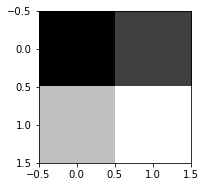

In [8]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

**SAME** means that the output feature map has the same spatial dimensions as the input feature map. Zero padding is introduced to make the shapes match as needed, equally on every side of the input map.   
**VALID** means no padding.

Padding could be used in convolution and pooling operations.
Here, take pooling for example:


In this example:

Input width = 13  
Filter width = 6  
Stride = 5  

Notes:

"**VALID**" only ever drops the right-most columns (or bottom-most rows).    
"**SAME**" tries to pad evenly left and right, but if the amount of columns to be added is odd, it will add the extra column to the right, as is the case in this example (the same logic applies vertically: there may be an extra row of zeros at the bottom).

The TensorFlow Convolution example gives an overview about the difference between SAME and VALID :

For the ***SAME*** padding, the output height and width are computed as:

*out_height = ceil(float(in_height) / float(strides[1]))*

*out_width = ceil(float(in_width) / float(strides[2]))*     

*pad_along_height = ((out_height - 1) * strides[1] + filter_height - in_height)*

*pad_along_width = ((out_width - 1) * strides[2] + filter_width - in_width)* 

*pad_top = pad_along_height / 2*   

*pad_left = pad_along_width / 2*    

And

For the ***VALID*** padding, the output height and width are computed as:

*out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))*

*out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))*    

http://blog.csdn.net/jasonzzj/article/details/53930074    
https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#convolution 

## 1 filter (2,2,1,1) with padding:SAME
![image](https://cloud.githubusercontent.com/assets/901975/24833381/fd01869e-1cf9-11e7-9d59-df08c7c6e5c4.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


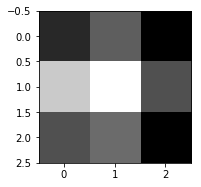

In [9]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters (2,2,1,3)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


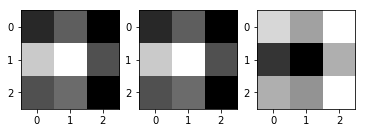

In [10]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## weight and its shape

In [11]:
weight1 = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight1.shape)
weight2 = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight2.shape)

weight.shape (2, 2, 1, 1)
weight.shape (2, 2, 1, 3)


## MAX POOLING
![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)

![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)


In [12]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


## SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

In [13]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


# MNIST image loading

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


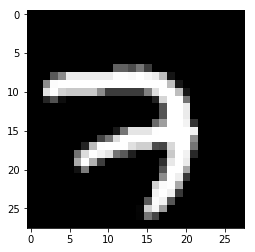

In [15]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

### without cmap parameters

(28, 28)

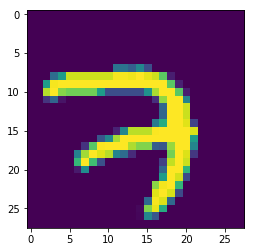

In [16]:
plt.imshow(img)
img.shape


##### can not show the image

In [17]:
img = img.reshape(-1,28,28,1)
# plt.imshow(img)
img.shape

(1, 28, 28, 1)

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


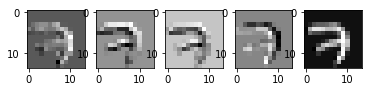

In [18]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

image:  1,28,28,1 ***[batch, in_height, in_width, in_channels]***   
 - _,W1,H1,D1

W(filter): 3,3,1,5 ***[filter_height, filter_width, in_channels, channel_multiplier]***  
 - F⋅F⋅D1,K   
Stride: 1,2,2,1    S: 2  P: 1    
**new image**:W2×H2×D2      
W2=(W1−F+2P)/S+1=(28-3+2*1)/2+1 = 14   
H2=(H1−F+2P)/S+1=(28-3+2*1)/2+1 = 14   
D2=K   
so    
 - W2,H2,D2 1,14,14,5

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


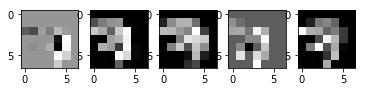

In [19]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')